In [4]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf


In [5]:
df = pd.read_csv("reliance.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-16,492.828491,493.720032,485.745605,488.643158,476.132629,7638174
1,2016-11-17,488.370728,494.388702,482.625183,484.284454,471.885529,5827994
2,2016-11-18,487.875427,491.689270,486.389526,489.113678,476.591095,8382568
3,2016-11-21,489.138458,492.110291,486.983887,491.094910,478.521637,6106766
4,2016-11-22,494.165802,499.168396,491.986450,496.023193,483.323700,8143790


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,2549.899902,4731975
1230,2021-11-11,2540.050049,2570.500000,2535.550049,2554.550049,2554.550049,4948422
1231,2021-11-12,2562.899902,2598.750000,2557.000000,2593.100098,2593.100098,4020744
1232,2021-11-15,2600.000000,2602.199951,2570.000000,2577.800049,2577.800049,2216708
1233,2021-11-16,2572.050049,2575.000000,2495.000000,2517.899902,2517.899902,5230607


In [8]:
df= df[["Close"]].copy()

In [9]:
df

,Close
0,488.643158
1,484.284454
2,489.113678
3,491.094910
4,496.023193
...,...
1229,2549.899902
1230,2554.550049
1231,2593.100098
1232,2577.800049


In [10]:
df.describe()

,Close
count,1234.000000
mean,1353.380503
std,556.307765
min,484.284454
25%,917.428680
50%,1244.330017
75%,1925.425049
max,2731.850098


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
result =adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: -0.2818788225661795
p-value: 0.9280319106068732


In [13]:
result

(-0.2818788225661795,
 0.9280319106068732,
 0,
 1233,
 {'1%': -3.4356646522289815,
  '5%': -2.863886926389418,
  '10%': -2.568019536239491},
 11446.982592525248)

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

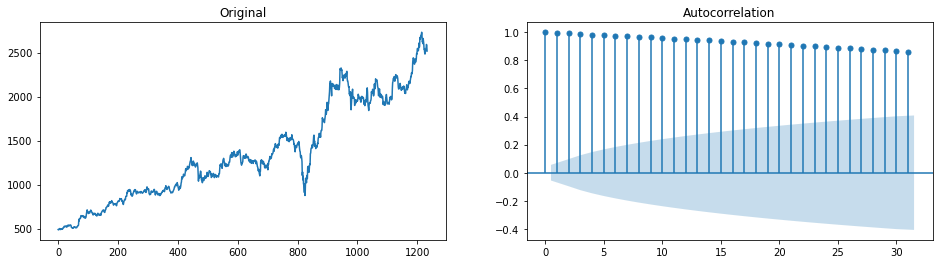

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

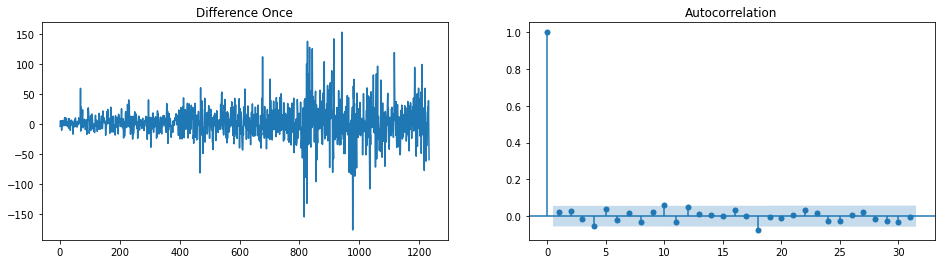

In [16]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


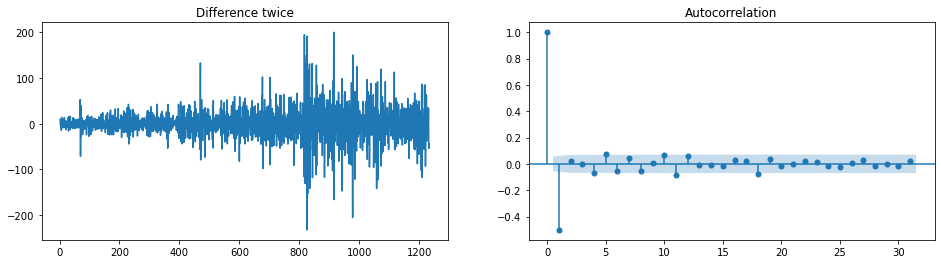

In [17]:
diff = df.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);


In [18]:
from pmdarima.arima.utils import ndiffs

ModuleNotFoundError: No module named 'pmdarima'

In [19]:
ndiffs(df.Close, test="adf")

NameError: name 'ndiffs' is not defined

1 is the value of d.

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

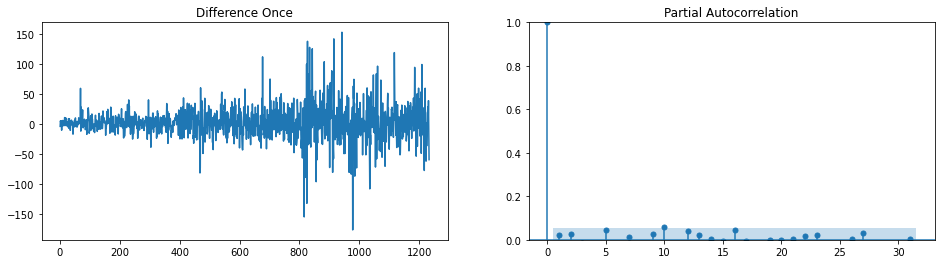

In [21]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


from above right side graph we can see 5th line have highest height. so p value is 5

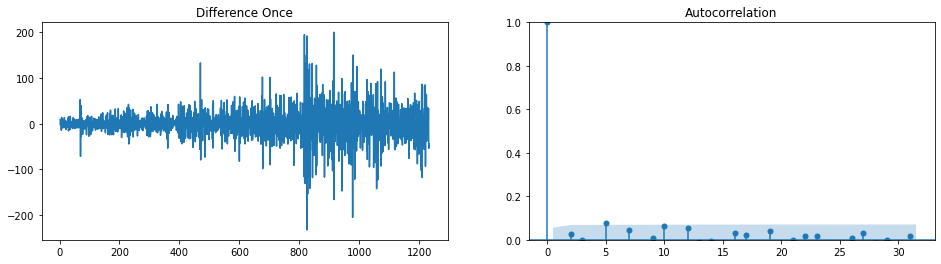

In [22]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

13 can be suitable for the q value becuse of havinig medium height in graph.

p, q, d = 5, 13, 1

Fitting in arima model


In [23]:
df = df.Close.astype('float32')
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
            except:
                continue

print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

NameError: name 'p_values' is not defined

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model = ARIMA(df.Close, order=(1,2,1))
result = model.fit(disp=1)

NameError: name 'Close' is not defined

In [ ]:
print(result.summary())

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

In [ ]:
result.plot_predict(
    start=-1,
    end=60,
    dynamic=False,
);

TypeError: Expect data.index as DatetimeIndex